# Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load Data

In [70]:
# Create pandas dataframes from csv
df_L = pd.read_csv("../logs/MainLog-2.03_Final.csv", sep=",", header=0)
df_F = pd.read_csv("../logs/MainLog-2.04_FullBFS.csv", sep=",", header=0)

# Split  synthetic/complex
df_L_synthetic = df_L[df_L['name'].str.match('synth')]
df_L_complex = df_L[~df_L['name'].str.match('synth')]

# Style plot
plt.style.use('default')
font = {'size' : 20}
plt.rc('font', **font)

# Print results for Light BFS

In [71]:
dfFalse = df_L[df_L['verified'] == False]
dfError = dfFalse[dfFalse['millis'] < 180000]
print(dfError)

numSynthetic = df_L_synthetic.shape[0]
dfSyntheticSolved = df_L_synthetic[df_L_synthetic['verified'] == True]
numSyntheticSolved = dfSyntheticSolved.shape[0]
print("Synthetic: " + str(numSyntheticSolved) + "/" + str(numSynthetic)
      + " (" + str(numSyntheticSolved * 100 / numSynthetic if numSynthetic else 100) + "%)")

numComplex = df_L_complex.shape[0]
dfComplexSolved = df_L_complex[df_L_complex['verified'] == True]
numComplexSolved = dfComplexSolved.shape[0]
print("Complex: " + str(numComplexSolved) + "/" + str(numComplex)
      + " (" + str(numComplexSolved * 100 / numComplex if numComplex else 100) + "%)")

num_overall = df_L.shape[0]
df_solved = df_L[df_L['verified'] == True]
num_solved = df_solved.shape[0]
print("Overall: " + str(num_solved) + "/" + str(num_overall)
      + " (" + str(num_solved * 100 / num_overall) + "%)")

Empty DataFrame
Columns: [name, k_optimal, k_solved, millis, verified, recursive_steps]
Index: []
Synthetic: 374/441 (84.80725623582767%)
Complex: 208/220 (94.54545454545455%)
Overall: 582/661 (88.04841149773071%)


# BFS Comparison (Light vs Full)

C:\Users\lenna\AppData\Local\Temp/ipykernel_17808/1157265179.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


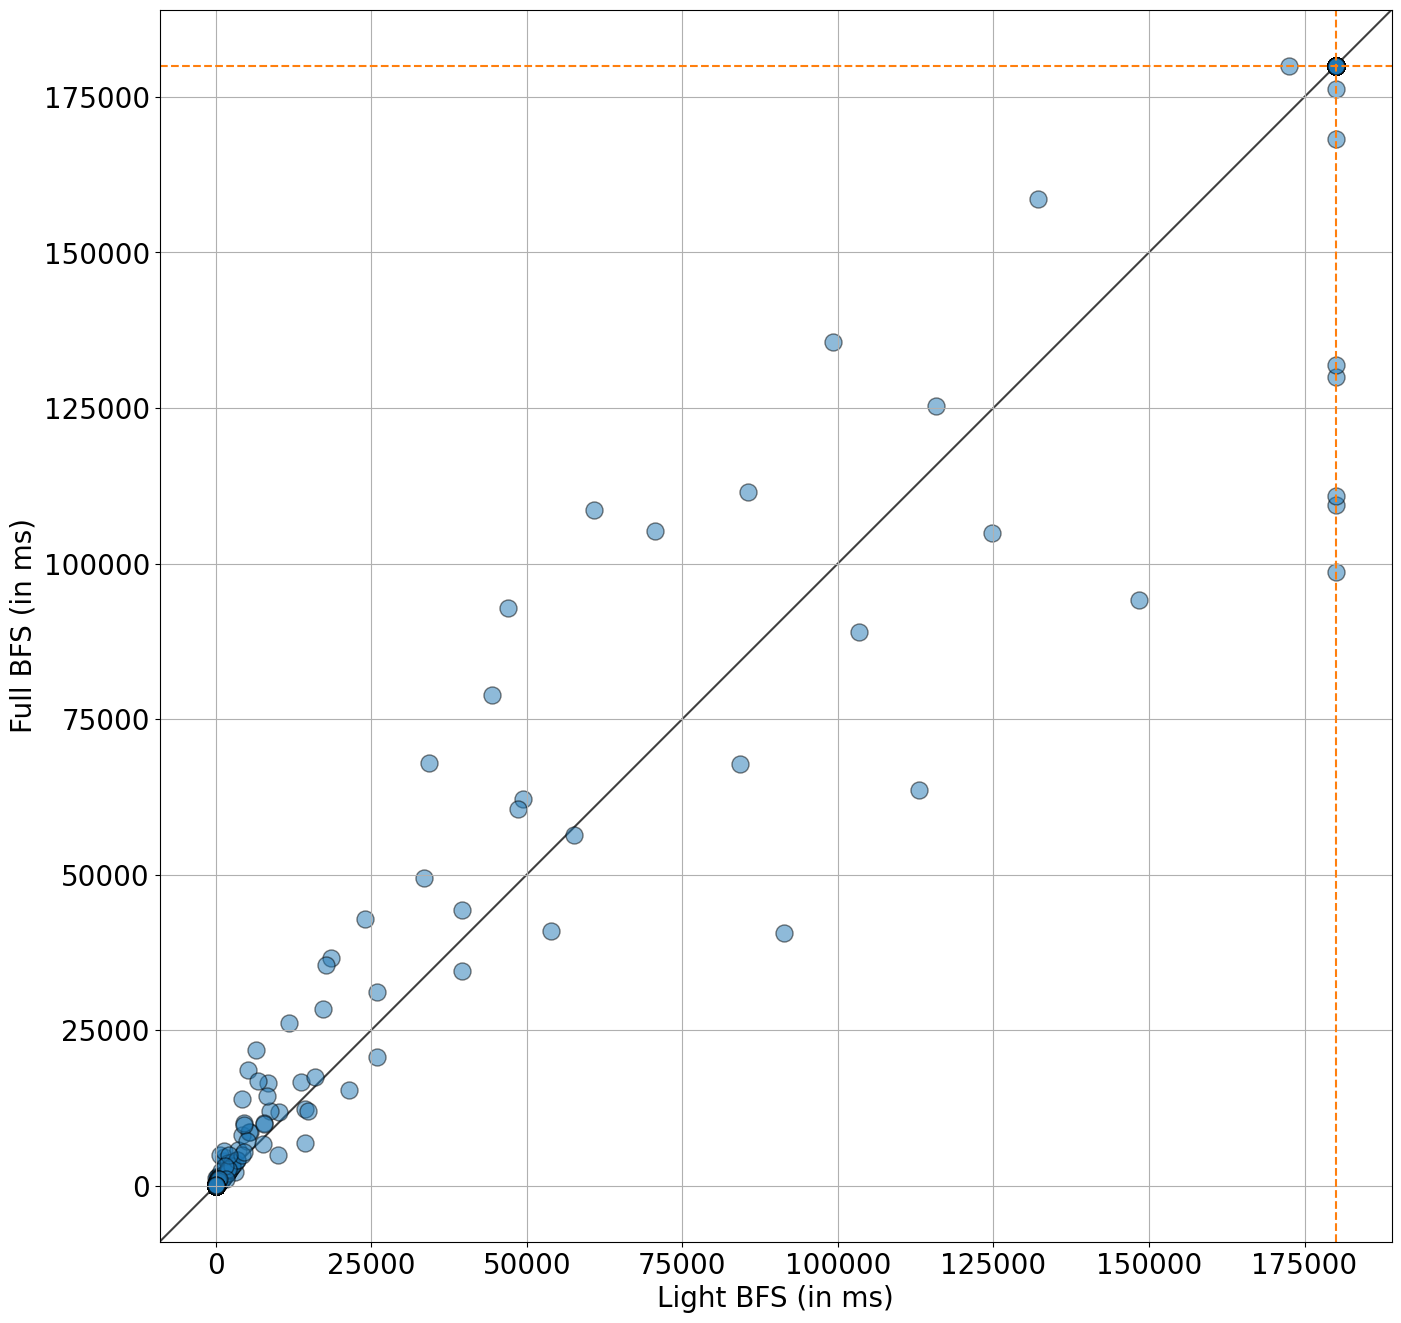

In [76]:
df_F_renamed = df_F.rename(columns={'millis': 'millis_F'})
df_L_renamed = df_L.rename(columns={'millis': 'millis_L'})
dfMerge = df_F_renamed.merge(df_L_renamed, on = "name", how = 'inner')

fig, ax = plt.subplots(figsize=(16,16))
ax.axhline(y=180000, color='tab:orange', linestyle='--')
ax.axvline(x=180000, color='tab:orange', linestyle='--')
ax.scatter(dfMerge['millis_L'], dfMerge['millis_F'], c='tab:blue', edgecolors='black', marker='o', alpha=0.5, s=150)
plt.xlabel('Light BFS (in ms)')
plt.ylabel('Full BFS (in ms)')
ax.grid()


x = np.array([0,180000])
y = np.array([0,180000])
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

fig.savefig('plots/BFSComparison.png',  bbox_inches='tight')
fig.show()

# Light BFS Optimization Comparison

C:\Users\lenna\AppData\Local\Temp/ipykernel_17808/1896722690.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


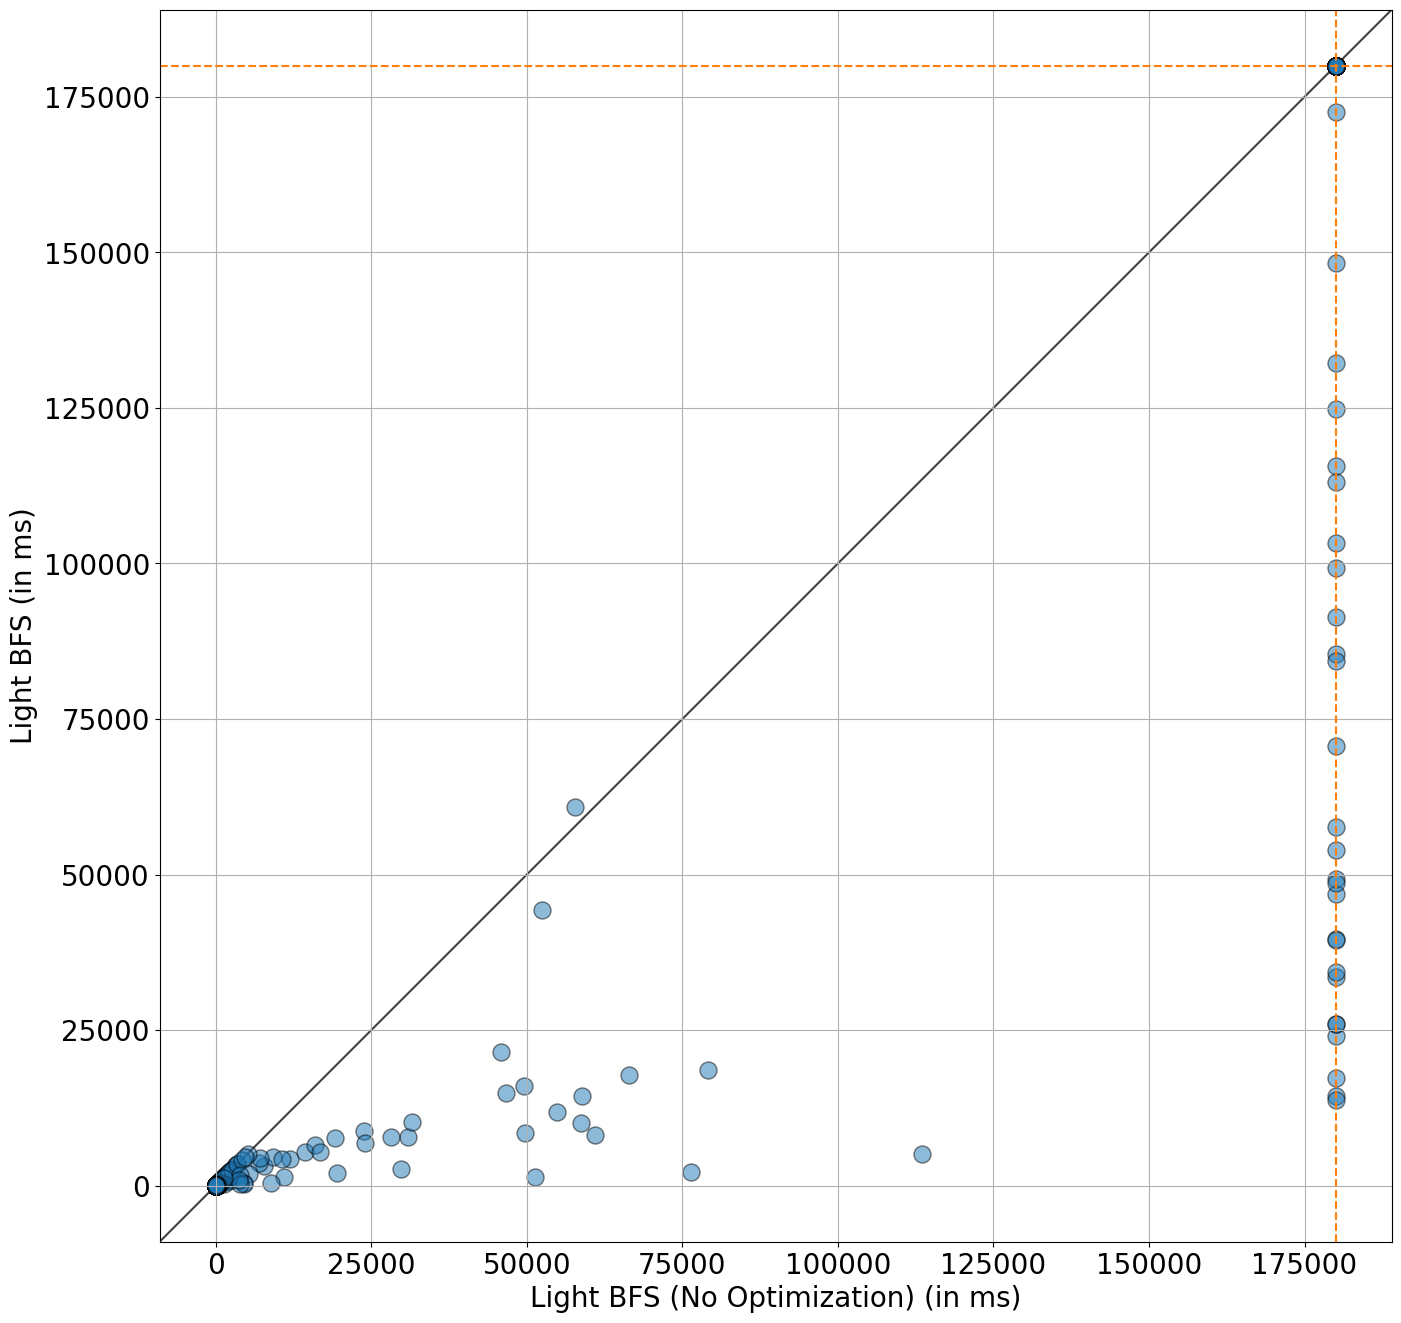

In [79]:
df_L_NoOpt = pd.read_csv("../logs/MainLog-2.02_NoBFSOptimization.csv", sep=",", header=0)
df_L_NoOpt_renamed = df_L_NoOpt.rename(columns={'millis': 'millisNoOpt'})
dfFinal = pd.read_csv("../logs/MainLog-2.03_Final.csv", sep=",", header=0)
df_L_renamed = df_L.rename(columns={'millis': 'millis_L'})
dfMerge = df_L_NoOpt_renamed.merge(df_L_renamed, on = "name", how = 'inner')

fig, ax = plt.subplots(figsize=(16,16))
ax.axhline(y=180000, color='tab:orange', linestyle='--')
ax.axvline(x=180000, color='tab:orange', linestyle='--')
ax.scatter(dfMerge['millisNoOpt'], dfMerge['millis_L'], c='tab:blue', edgecolors='black', marker='o', alpha=0.5, s=150)
plt.xlabel('Light BFS (No Optimization) (in ms)')
plt.ylabel('Light BFS (in ms)')
ax.grid()


x = np.array([0,180000])
y = np.array([0,180000])
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

fig.savefig('plots/BFSOptimizationComparison.png',  bbox_inches='tight')
fig.show()


# Line Plot percentage over time (Light vs Full)

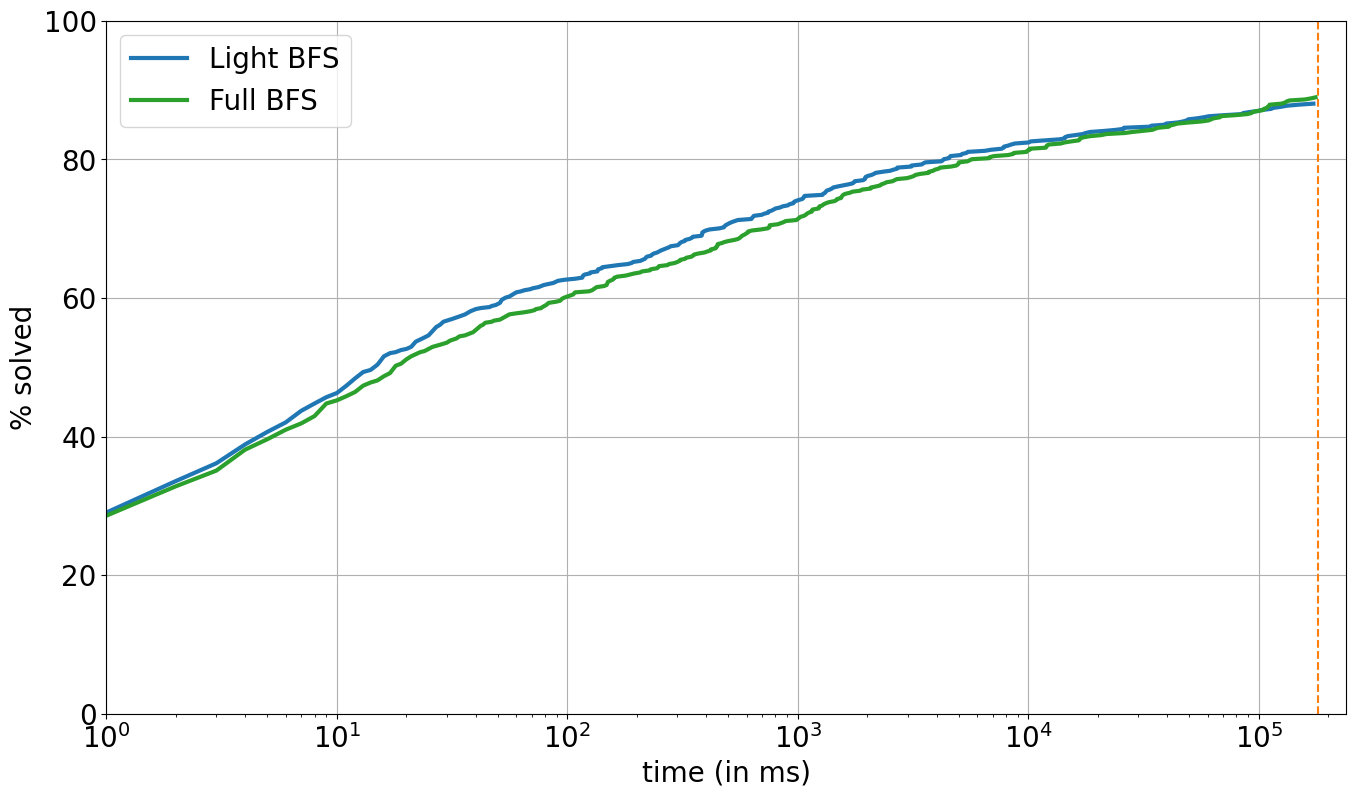

In [81]:
df_L_percentage = df_L[df_L['millis'] < 180000].groupby('millis').mean()
df_L_percentage['percentage_solved'] = 0.0

for index, row in df_L_percentage.iterrows():
    num_solved = df_L[df_L['millis'] <= index].shape[0]
    percentage_solved = num_solved / df_L.shape[0] * 100
    df_L_percentage.at[index, 'percentage_solved'] = percentage_solved

df_F_percentage = df_F[df_F['millis'] < 180000].groupby('millis').mean()
df_F_percentage['percentage_solved'] = 0.0

for index, row in df_F_percentage.iterrows():
    num_solved = df_F[df_F['millis'] <= index].shape[0]
    percentage_solved = num_solved / df_F.shape[0] * 100
    df_F_percentage.at[index, 'percentage_solved'] = percentage_solved



plt.figure(figsize=(16,9))
plt.axvline(x=180000, color='tab:orange', linestyle='--')
plt.plot(df_L_percentage['percentage_solved'], c='tab:blue', linewidth='3', label='Light BFS')
plt.plot(df_F_percentage['percentage_solved'], c='tab:green', linewidth='3', label='Full BFS')
plt.xlabel('time (in ms)')
plt.ylabel('% solved')
plt.title('')
plt.ylim([0, 100])
plt.xlim([1, 240000])
plt.gca().set_xscale('log')
plt.grid()
plt.legend()
plt.savefig('plots/PercentageLinePlot.png',  bbox_inches='tight')
plt.show()

# Scatter Plot k (Light BFS)

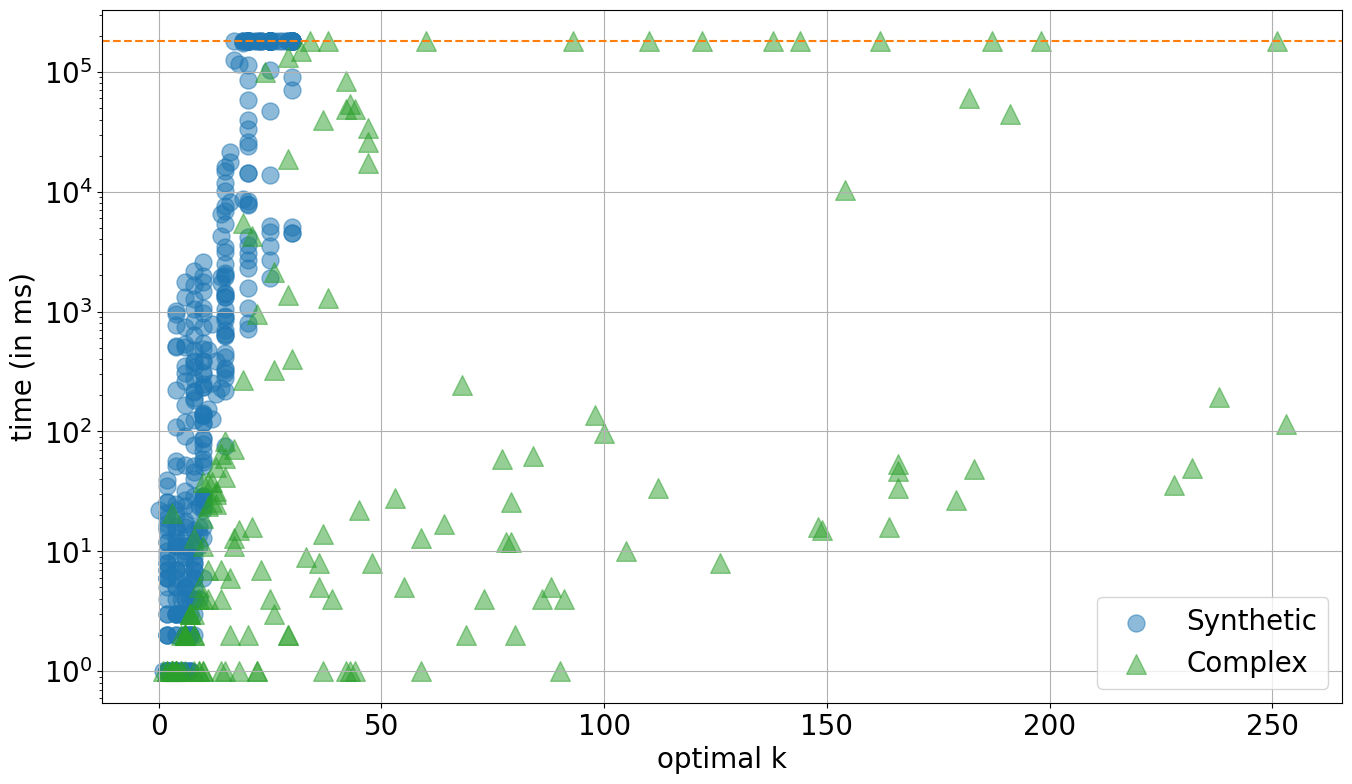

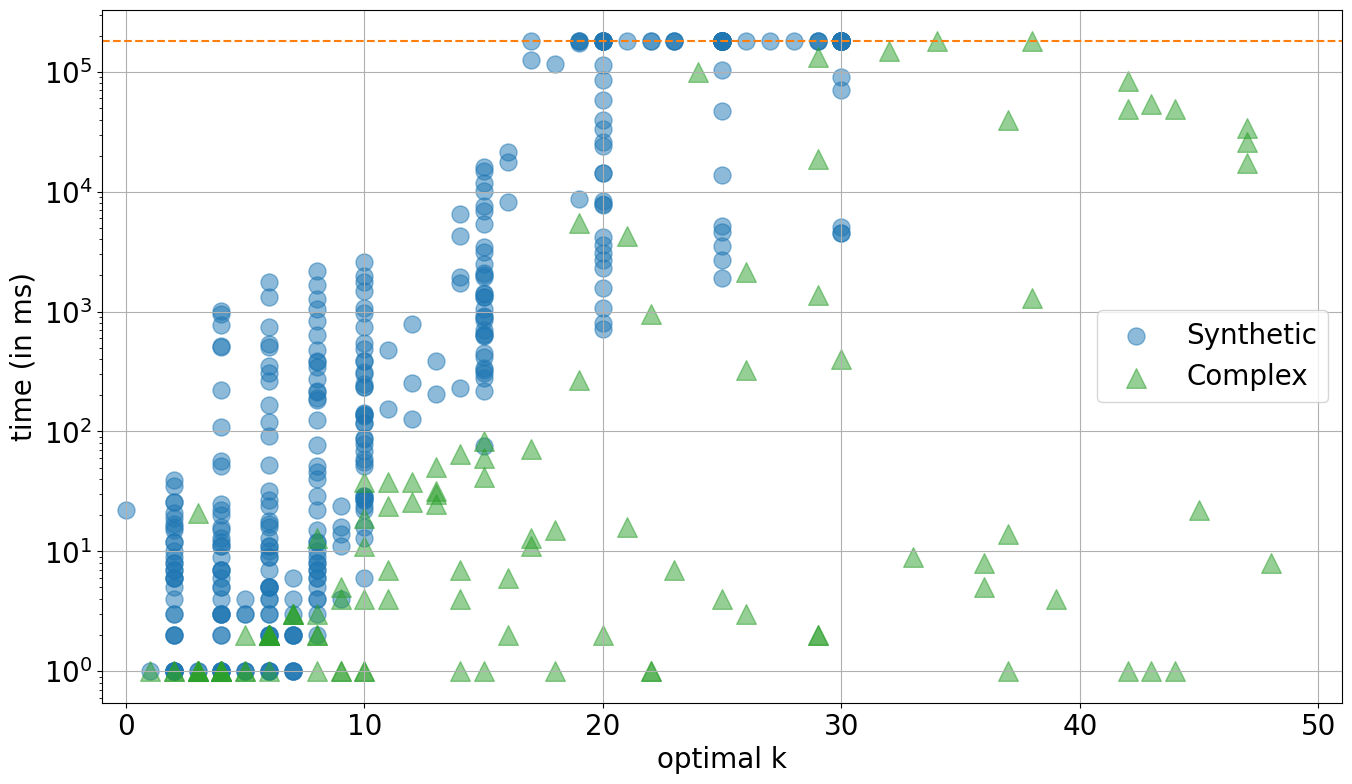

In [82]:
plt.figure(figsize=(16,9))
plt.axhline(y=180000, color='tab:orange', linestyle='--')
plt.scatter(df_L_synthetic['k_optimal'], df_L_synthetic['millis'], c='tab:blue', marker='o', alpha=0.5, s=150, label='Synthetic')
plt.scatter(df_L_complex['k_optimal'], df_L_complex['millis'], c='tab:green', marker='^', alpha=0.5, s=200, label='Complex')
plt.gca().set_yscale('log')
plt.xlabel('optimal k')
plt.ylabel('time (in ms)')
plt.legend()
plt.grid()
plt.savefig('plots/SyntheticComplexScatterPlot_1.png',  bbox_inches='tight')
plt.show()

plt.figure(figsize=(16,9))
plt.axhline(y=180000, color='tab:orange', linestyle='--')
plt.scatter(df_L_synthetic['k_optimal'], df_L_synthetic['millis'], c='tab:blue', marker='o', alpha=0.5, s=150, label='Synthetic')
plt.scatter(df_L_complex['k_optimal'], df_L_complex['millis'], c='tab:green', marker='^', alpha=0.5, s=200, label='Complex')
plt.gca().set_yscale('log')
plt.xlabel('optimal k')
plt.ylabel('time (in ms)')
plt.legend()
plt.grid()
plt.xlim([-1, 51])
plt.savefig('plots/SyntheticComplexScatterPlot_2.png',  bbox_inches='tight')
plt.show()